# Checkpoint 1

A partir do dataset enviado, responda:

## Importação e Análise Inicial

1. Importe o arquivo CSV.(0,33)
2. Quantas linhas tem o dataset?(0,33)
3. Quantas colunas tem o dataset?(0,33)
4. Quais colunas têm o tipo `object`?(0,34)
5. Quais colunas têm o tipo `int64`?(0,34)
6. Existe alguma coluna de outro tipo?(0,33)

## Análise Estatística

7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

## Análise de Categorias

10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)
11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5)
12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5)
13. Execute o processo de dummy na coluna `country`.(0,5)

## Análise de Valores Nulos

14. Qual a quantidade de valores nulos em cada feature?(0,66)
15. Qual a proporção de valores nulos por valores não nulos em cada feature?(0,66)
16. Faça o tratamento desses nulos e explique por que escolheu cada método.(0,68)

## Visualização Gráfica

17. Visualização Gráfica da feature `state`.(2)



----------------------------------------
🧩 Desafio: ETL de Dados Públicos

🎯 Objetivo
Construir um pipeline ETL no Apache Airflow que:

Extrai dados de algum dataset público

Transforma os dados limpando, filtrando e unificando informações.

Carrega o resultado em um banco de dados PostgreSQL (ou salva como Parquet).

Agenda a execução diária do pipeline (simulando ingestão incremental).

In [31]:
!pip install pandas matplotlib seaborn

  Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp314-cp314-macosx_10_13_universal2.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp314-cp314-macosx_11_0_arm64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.3-cp314-cp314-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp314-cp314-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.9-cp314-cp314-macosx_11_0_arm64.whl (64 kB)
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
#1 import csv
df = pd.read_csv('resources/precos-gasolina-etanol-07.csv', sep=';', decimal=',')
df.info() 

# Resposta do 2, 3, 4, 5 e 6 vem do info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Regiao - Sigla     45181 non-null  object 
 1   Estado - Sigla     45181 non-null  object 
 2   Municipio          45181 non-null  object 
 3   Revenda            45181 non-null  object 
 4   CNPJ da Revenda    45181 non-null  object 
 5   Nome da Rua        45181 non-null  object 
 6   Numero Rua         45175 non-null  object 
 7   Complemento        9637 non-null   object 
 8   Bairro             45114 non-null  object 
 9   Cep                45181 non-null  object 
 10  Produto            45181 non-null  object 
 11  Data da Coleta     45181 non-null  object 
 12  Valor de Venda     45181 non-null  float64
 13  Valor de Compra    0 non-null      float64
 14  Unidade de Medida  45181 non-null  object 
 15  Bandeira           45181 non-null  object 
dtypes: float64(2), object(

In [ ]:
#7. Qual foi o total, o máximo, o mínimo do objetivo financeiro de todos os projetos (goal)?(0,66)
#8. Qual o total, o máximo, o mínimo e o valor que representa 25% do dinheiro levantado (pledged)?(0,67)
#9. Qual o total, o máximo, o mínimo e o valor que representa 75% dos apoiadores dos projetos(backers)?(0,67)

#10. Qual a `category` mais presente? E quantos valores únicos ela possui?(0,5)
#11. Qual a `main_category` mais presente? E quantos valores únicos ela possui?(0,5)
#12. Qual a `currency` mais presente? E quantos valores únicos ela possui?(0,5)
#13. Execute o processo de dummy na coluna `country`.(0,5)

# 7,8 e 9
print('---')
print(df['Valor de Venda'].describe())
print('---')
print(df['Produto'].describe())
print('---')
print(df['Revenda'].describe())
print('---')

---
count    45181.000000
mean         5.685412
std          1.013648
min          3.090000
25%          4.790000
50%          5.990000
75%          6.390000
max          9.390000
Name: Valor de Venda, dtype: float64
---
count        45181
unique           3
top       GASOLINA
freq         17232
Name: Produto, dtype: object
---
count                                      45181
unique                                      5059
top       CASCOL COMBUSTIVEIS PARA VEICULOS LTDA
freq                                         462
Name: Revenda, dtype: object
---
Distribuição por tipo de produto
Produto
GASOLINA              38.139926
ETANOL                31.993537
GASOLINA ADITIVADA    29.866537
Name: proportion, dtype: float64
---
Bandeiras mais frequentes
Bandeira
BRANCA         14146
VIBRA          10664
IPIRANGA        9822
RAIZEN          6782
ALE             1198
SABBÁ            552
RODOIL           222
ATEM' S          204
CHARRUA          168
RAIZEN MIME      143
Name: count, dtype: in

Estado - Sigla
AC    7.170168
AM    6.775175
RR    6.626105
RO    6.498249
SE    6.240040
PA    6.171582
DF    6.098504
CE    6.079467
RS    6.028118
AP    6.006692
SC    5.992456
AL    5.956958
TO    5.904625
PE    5.863482
RN    5.838490
MA    5.837152
BA    5.811477
ES    5.767765
PR    5.724836
MS    5.687542
RJ    5.687447
PI    5.587293
PB    5.532885
GO    5.495412
MG    5.493036
SP    5.398563
MT    5.292970
Name: Valor de Venda, dtype: float64

In [ ]:
# 9.Distribuição por tipo de produto
print('Distribuição por tipo de produto')
print(df['Produto'].value_counts(normalize=True) * 100)

# 10.Bandeiras mais frequentes
print('---')
print('Bandeiras mais frequentes')
print(df['Bandeira'].value_counts().head(10))
# 11.Bandeiras mais frequentes
print('---')
print('Top estados com media mais cara')
df.groupby('Estado - Sigla')['Valor de Venda'].mean().sort_values(ascending=False)
# 12.Bandeiras mais frequentes
print('---')
print('Top estados com media mais cara')
df.groupby('Estado - Sigla')['Valor de Venda'].mean().sort_values(ascending=False)


Distribuição por tipo de produto
Produto
GASOLINA              38.139926
ETANOL                31.993537
GASOLINA ADITIVADA    29.866537
Name: proportion, dtype: float64
---
Bandeiras mais frequentes
Bandeira
BRANCA         14146
VIBRA          10664
IPIRANGA        9822
RAIZEN          6782
ALE             1198
SABBÁ            552
RODOIL           222
ATEM' S          204
CHARRUA          168
RAIZEN MIME      143
Name: count, dtype: int64
---
Top estados com media mais cara


Estado - Sigla
AC    7.170168
AM    6.775175
RR    6.626105
RO    6.498249
SE    6.240040
PA    6.171582
DF    6.098504
CE    6.079467
RS    6.028118
AP    6.006692
SC    5.992456
AL    5.956958
TO    5.904625
PE    5.863482
RN    5.838490
MA    5.837152
BA    5.811477
ES    5.767765
PR    5.724836
MS    5.687542
RJ    5.687447
PI    5.587293
PB    5.532885
GO    5.495412
MG    5.493036
SP    5.398563
MT    5.292970
Name: Valor de Venda, dtype: float64

In [ ]:
# Dummyes everywhere

cols_cat = [
    'Regiao - Sigla',
    'Estado - Sigla',
    'Municipio',
    'Produto',
    'Bandeira',
    'Unidade de Medida'
]

df_dummies = pd.get_dummies(df, columns=cols_cat, drop_first=True)
print(df_dummies.info())
print(df_dummies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45181 entries, 0 to 45180
Columns: 464 entries, Revenda to Bandeira_WATT
dtypes: bool(454), float64(2), object(8)
memory usage: 23.0+ MB
None
                        Revenda      CNPJ da Revenda     Nome da Rua  \
0   AUTO POSTO M M GARROTE LTDA   08.738.994/0001-50  RODOVIA AL-220   
1   AUTO POSTO M M GARROTE LTDA   08.738.994/0001-50  RODOVIA AL-220   
2  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   
3  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   
4  AUTO POSTO MASSARANDUBA LTDA   07.248.398/0001-29  RODOVIA AL 220   

  Numero Rua Complemento       Bairro        Cep Data da Coleta  \
0       5848    KM    96  BOM SUCESSO  57309-035     01/07/2025   
1       5848    KM    96  BOM SUCESSO  57309-035     01/07/2025   
2       4698         NaN     PLANALTO  57308-000     01/07/2025   
3       4698         NaN     PLANALTO  57308-000     01/07/2025   
4       4698         NaN     PLANALTO  5

In [26]:
# Quantidade de valores nulos
print(df.isnull().sum())
print("---")
# Nao nulls proporcao
print((df.isnull().sum() / len(df)).round(4))

Regiao - Sigla           0
Estado - Sigla           0
Municipio                0
Revenda                  0
CNPJ da Revenda          0
Nome da Rua              0
Numero Rua               6
Complemento          35544
Bairro                  67
Cep                      0
Produto                  0
Data da Coleta           0
Valor de Venda           0
Valor de Compra      45181
Unidade de Medida        0
Bandeira                 0
dtype: int64
---
Regiao - Sigla       0.0000
Estado - Sigla       0.0000
Municipio            0.0000
Revenda              0.0000
CNPJ da Revenda      0.0000
Nome da Rua          0.0000
Numero Rua           0.0001
Complemento          0.7867
Bairro               0.0015
Cep                  0.0000
Produto              0.0000
Data da Coleta       0.0000
Valor de Venda       0.0000
Valor de Compra      1.0000
Unidade de Medida    0.0000
Bandeira             0.0000
dtype: float64


In [ ]:
clean_df = df.copy()

clean_df.drop(columns=['Valor de Compra'],inplace=True) # Não tem nada nesta coluna para todos os registros
clean_df['Numero Rua'].fillna('S/N', inplace=True) # Valor padrao para nao ter nulls, dps vira uma categoria
clean_df.drop(columns=['Complemento'], inplace=True) # Se ta null é pq n tem
clean_df['Bairro'].fillna('Não informado', inplace=True) # Bairro é uma categoria vai entrar na categoria nao informado

print(clean_df.isnull().sum())

Regiao - Sigla       0
Estado - Sigla       0
Municipio            0
Revenda              0
CNPJ da Revenda      0
Nome da Rua          0
Numero Rua           0
Bairro               0
Cep                  0
Produto              0
Data da Coleta       0
Valor de Venda       0
Unidade de Medida    0
Bandeira             0
dtype: int64


/var/folders/mx/th5bgtcn19d079t50rlghdrw0000gp/T/ipykernel_44476/1485623814.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Numero Rua'].fillna('S/N', inplace=True) # Valor padrao para nao ter nulls
/var/folders/mx/th5bgtcn19d079t50rlghdrw0000gp/T/ipykernel_44476/1485623814.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object

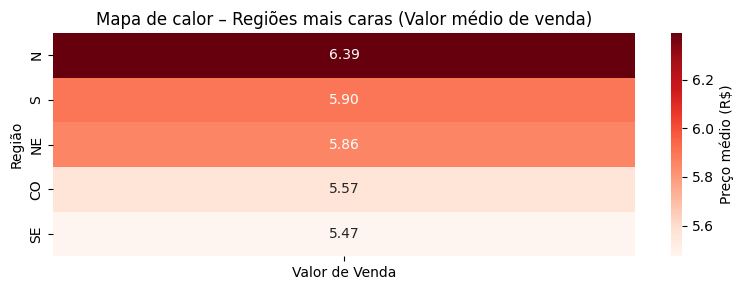

In [36]:

mean_region = df.groupby('Regiao - Sigla')['Valor de Venda'].mean().reset_index()

mean_region = mean_region.sort_values(by='Valor de Venda', ascending=False)

plt.figure(figsize=(8, 3))
sns.heatmap(
    mean_region[['Valor de Venda']].set_index(mean_region['Regiao - Sigla']),
    annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'Preço médio (R$)'}
)
plt.title('Mapa de calor – Regiões mais caras (Valor médio de venda)')
plt.ylabel('Região')
plt.xlabel('')
plt.tight_layout()
plt.show()

